# Importing Libraries

In [130]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
import numpy as np

import re
import json


from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
sns.set_palette('muted')  # Or use your custom palette


# Data Exploration

In [131]:
df = pd.read_csv('/content/weather data classification.csv')

About Dataset
1. Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
2. Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
3. Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
4. Precipitation (%) (numeric): The precipitation percentage, including outlier values.
5. Cloud Cover (categorical): The cloud cover description.
6. Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
7. UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
8. Season (categorical): The season during which the data was recorded.
9. Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
10. Location (categorical): The type of location where the data was recorded.
11. Weather Type (categorical)(the target): The target variable for classification, indicating the weather type.

In [132]:
df.head()

Wind Speed Precipitation (%)    Cloud Cover  \
0  0.002638888888888889KM/S              82.0  partly cloudy   
1                       8.5              71.0  partly CLOUDY   
2                       7.0              16.0          clear   
3                       1.5              82.0          clear   
4                      17.0              66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Wentar              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

                                                                 {Temperature},{Humdity}  \
0  {"Temperature": {"value": 14.0, "unit": "C"}, "Humidity": {"value": 73, "unit": "%"}}   
1  {"Temperature": {"value": 39.0, "unit": "C"}, "Humidity": {"value": 96, "unit": "%"}}   
2  {"Temperature": {"value": 30.0, "unit": "C"}, "Humidity": {"value": 64, "unit": "%"}}   
3  {"Temperature": {"value": 38.0, "unit": "C"}, "Humidity": {"value": 83, "unit": "%"}}   
4  {"Temperature": {"value": 27.0, "unit": "C"}, "Humidity": {"value": 74, "unit": "%"}}   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [133]:
df.shape

(13200, 10)

In [134]:
df.isna().sum().sort_values(ascending=False)

Wind Speed                 0
Precipitation (%)          0
Cloud Cover                0
Atmospheric Pressure       0
UV Index                   0
Season                     0
Visibility (km)            0
Location                   0
{Temperature},{Humdity}    0
Weather Type               0
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Wind Speed               13200 non-null  object 
 1   Precipitation (%)        13200 non-null  object 
 2   Cloud Cover              13200 non-null  object 
 3   Atmospheric Pressure     13200 non-null  float64
 4   UV Index                 13200 non-null  int64  
 5   Season                   13200 non-null  object 
 6   Visibility (km)          13200 non-null  float64
 7   Location                 13200 non-null  object 
 8   {Temperature},{Humdity}  13200 non-null  object 
 9   Weather Type             13200 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.0+ MB


In [136]:
df.describe().T

count         mean        std     min    25%      50%  \
Atmospheric Pressure  13200.0  1005.827896  37.199589  800.12  994.8  1007.65   
UV Index              13200.0     4.005758   3.856600    0.00    1.0     3.00   
Visibility (km)       13200.0     5.462917   3.371499    0.00    3.0     5.00   

                            75%      max  
Atmospheric Pressure  1016.7725  1199.21  
UV Index                 7.0000    14.00  
Visibility (km)          7.5000    20.00

In [137]:
df.describe(include = 'object').T

count unique  \
Wind Speed               13200    245   
Precipitation (%)        13200    219   
Cloud Cover              13200     16   
Season                   13200     16   
Location                 13200      3   
{Temperature},{Humdity}  13200   4109   
Weather Type             13200      4   

                                                                                                           top  \
Wind Speed                                                                                                 8.0   
Precipitation (%)                                                                                         19.0   
Cloud Cover                                                                                           overcast   
Season                                                                                                  Winter   
Location                                                                                                inland   
{Temperature},{Humdity}  {"Temperature": {"value": 30.0, "unit": "C"}, "Humidity": {"value": 61, "unit": "%"}}   
Weather Type                                                                                             Rainy   

                         freq  
Wind Speed                394  
Precipitation (%)         222  
Cloud Cover              5890  
Season                   4610  
Location                 4816  
{Temperature},{Humdity}    16  
Weather Type             3300

In [138]:
df.duplicated().sum()

np.int64(0)

# Cleaning

In [139]:
df.columns

Index(['Wind Speed', 'Precipitation (%)', 'Cloud Cover',
       'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)',
       'Location', '{Temperature},{Humdity}', 'Weather Type'],
      dtype='object')

## Used Functions

In [140]:
def remove_outliers_iqr_to_nan(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with NaN
    df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound), np.nan)
    return df

## `Wind Speed` Column

In [141]:
df['Wind Speed'].dtype

dtype('O')

In [142]:
df['Wind Speed'].unique()

array(['0.002638888888888889KM/S', '8.5', '7.0', '1.5', '17.0', '3.5',
       '0.0022222222222222222KM/S', '6.0', '2000.0M/H', '10.5', '15.0',
       '6.5', '0.5', '0.0001388888888888889KM/S', '12000.0M/H', '12.5',
       '7.5', '13.5', '1.0', '7500.0M/H', '4.0', '16.0', '16.5', '2.5',
       '0.006388888888888889KM/S', '0.0008333333333333334KM/S', '10.0',
       '0.007083333333333333KM/S', '19.0', '11500.0M/H', '2.0',
       '0.002777777777777778KM/S', '0.0', '9.0', '9.5', '18500.0M/H',
       '0.0030555555555555557KM/S', '20.0', '14000.0M/H', '5.5', '13.0',
       '18.5', '14.0', '0.012916666666666667KM/S', '8.0', '3.0',
       '3500.0M/H', '5.0', '18000.0M/H', '12.0',
       '0.007916666666666667KM/S', '14.5', '11.0', '0.005KM/S', '0.0M/H',
       '4.5', '15.5', '0.0002777777777777778KM/S',
       '0.0077777777777777776KM/S', '18.0', '0.0005555555555555556KM/S',
       '4500.0M/H', '0.0025KM/S', '19.5', '6500.0M/H', '10500.0M/H',
       '0.0015277777777777779KM/S', '11000.0M/H', '11

In [143]:
def convert_wind_speed(value):
    value = str(value).strip()
    try:
        if value.endswith('KM/S'):
            # Convert KM/S to KM/H
            num = float(value.replace('KM/S', ''))
            return num * 3600
        elif value.endswith('M/H'):
            # Convert M/H to KM/H
            num = float(value.replace('M/H', ''))
            return num / 1000
        elif value.replace('.', '', 1).isdigit():
            # Assume it's already in KM/H
            return float(value)
        elif value == '0.0KM/S' or value == '0.0M/H':
            return 0.0
        else:
            return np.nan  # Unrecognized format
    except:
        return np.nan  # Fallback for malformed data

In [144]:
df['Wind Speed'] = df['Wind Speed'].apply(convert_wind_speed)

In [145]:
df['Wind Speed'].unique()

array([ 9.5,  8.5,  7. ,  1.5, 17. ,  3.5,  8. ,  6. ,  2. , 10.5, 15. ,
        6.5,  0.5, 12. , 12.5,  7.5, 13.5,  1. ,  4. , 16. , 16.5,  2.5,
       23. ,  3. , 10. , 25.5, 19. , 11.5,  0. ,  9. , 18.5, 11. , 20. ,
       14. ,  5.5, 13. , 46.5,  5. , 18. , 28.5, 14.5,  4.5, 15.5, 28. ,
       19.5, 21.5, 34. , 17.5, 47. , 34.5, 35.5, 23.5, 42.5, 33. , 31.5,
       26. , 22. , 36.5, 27.5, 20.5, 35. , 30. , 26.5, 21. , 32.5, 32. ,
       24. , 27. , 22.5, 31. , 30.5, 24.5, 29.5, 37. , 44.5, 28.5, 41. ,
       41.5, 40.5, 37.5, 46. , 25. , 39. , 29. , 45. , 43.5, 45.5, 36. ,
       38. , 44. , 38.5, 33.5, 40. , 42. , 47.5, 39.5, 43. , 48.5])

In [146]:
df['Wind Speed'].dtype

dtype('float64')

In [147]:
df['Wind Speed'].isna().sum()

np.int64(0)

<Axes: ylabel='Wind Speed'>

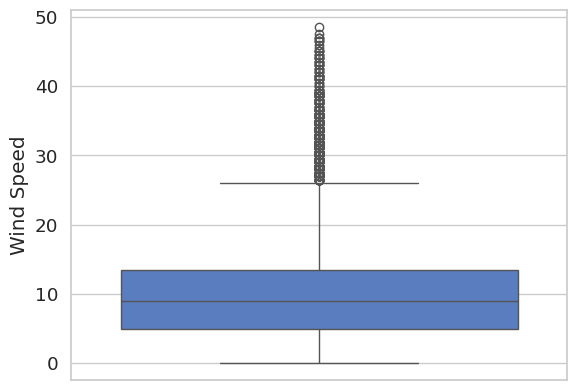

In [148]:
sns.boxplot(df['Wind Speed'])

In [149]:
df = remove_outliers_iqr_to_nan(df, 'Wind Speed')

In [150]:
df['Wind Speed'].isna().sum()

np.int64(404)

<Axes: xlabel='Wind Speed', ylabel='Count'>

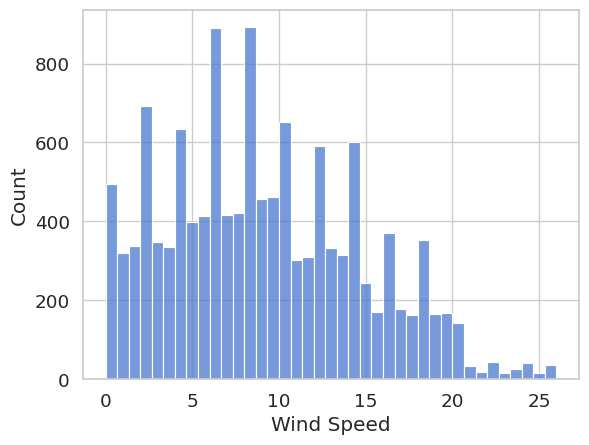

In [151]:
sns.histplot(df['Wind Speed'])

## `Precipitation (%)` Column

In [152]:
df['Precipitation (%)'].unique()

array(['82.0', '71.0', '16.0', '66.0', '26.0', '86.0', '96.0', '107.0',
       '25.0', '67.0', '8.0', '46.0', '13.0', '27.0', '15.0', '72.0',
       '75.0', '98.0', '18.0', '29.0', '101.0', '85.0', '62.0', '12.0',
       '3.0', '54.0', '97.0', '63.0', '56.0', '91.0', '6.0', '76.0',
       '109.0', '58.0', '37.0', '9.0', '0.0', '39.0', '11.0', '14.0',
       '88.0', '78.0', '55.0', '90.0', '4.0', '69.0', '68.0', '32.0',
       '87.0', '17.0', '89.0', '57.0', '41.0', '84.0', '90.0%', '83.0',
       '47.0', '99.0', '92.0', '19.0', '60.0percent', '65.0', '5.0',
       '43.0', '2.0', '59.0', '79.0', '94.0', '42.0', '53.0', '73.0',
       '81.0', '52.0', '36.0', '45.0', '21.0', '22.0', '40.0', '50.0',
       '51.0', '10.0', '35.0', '95.0', '103.0', '7.0', '74.0', '48.0',
       '61.0', '57.0percent', '60.0', '64.0', '31.0', '106.0', '93.0',
       '24.0', '1.0', '80.0', '23.0', '70.0', '20.0', '104.0', '82.0%',
       '77.0', '30.0', '50.0%', '33.0', '38.0', '72.0%', '34.0', '57.0%',
       

In [153]:
df['Precipitation (%)'] = df['Precipitation (%)'].str.replace('%', '', regex=False)
df['Precipitation (%)'] = df['Precipitation (%)'].str.replace('percent', '', regex=False)
df['Precipitation (%)'] = df['Precipitation (%)'].astype(float)

In [154]:
df.loc[(df['Precipitation (%)'] < 0) | (df['Precipitation (%)'] > 100), 'Precipitation (%)'] = np.nan

In [155]:
df['Precipitation (%)'].isna().sum()

np.int64(392)

## `Cloud Cover` Column

In [156]:
df['Cloud Cover'].unique()

array(['partly cloudy', 'partly CLOUDY', 'clear', 'overcast', 'Clear',
       'clr', 'Clr', 'Party cloudy', 'partly cloddy', 'partly Cloudy',
       'overCst', 'OVRCST', 'cleer', 'cloudy', 'over cast', 'Overcast'],
      dtype=object)

In [157]:
df['Cloud Cover']=df['Cloud Cover'].str.lower()

In [158]:
df['Cloud Cover'] = df['Cloud Cover'].replace({
    'partly cloddy': 'partly cloudy',
    'party cloudy': 'partly cloudy',
    'over cast': 'overcast',
    'overcst': 'overcast',
    'ovrcst': 'overcast',
    'clr': 'clear',
    'cleer': 'clear',
})

In [159]:
df['Cloud Cover'].value_counts()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

In [160]:
df['Cloud Cover'].isna().sum()

np.int64(0)

## `Atmospheric Pressure` Column

In [161]:
df['Atmospheric Pressure'].dtype

dtype('float64')

<Axes: xlabel='Atmospheric Pressure', ylabel='Count'>

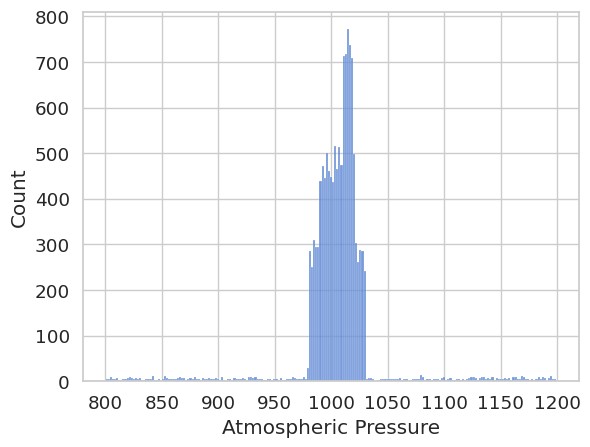

In [162]:
sns.histplot(df['Atmospheric Pressure'])

<Axes: ylabel='Atmospheric Pressure'>

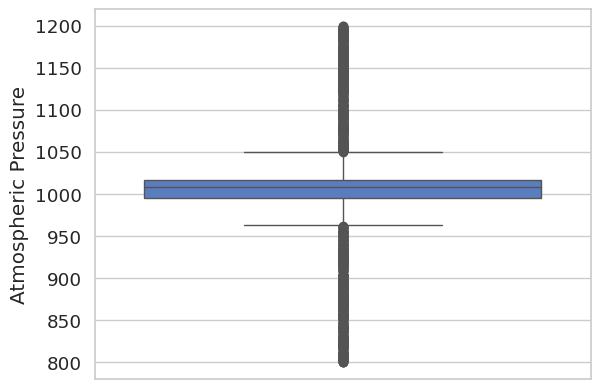

In [163]:
sns.boxplot(df['Atmospheric Pressure'])

In [164]:
df = remove_outliers_iqr_to_nan(df, 'Atmospheric Pressure')

In [165]:
df['Atmospheric Pressure'].isna().sum()

np.int64(927)

In [166]:
df['Atmospheric Pressure'].isna().sum()/len(df['Atmospheric Pressure'])

np.float64(0.07022727272727272)

## `UV Index` Column

In [167]:
df['UV Index'].dtype

dtype('int64')

In [168]:
df['UV Index'].unique()

array([ 2,  7,  5,  1,  0,  8, 11,  3,  9,  4, 13, 10, 14,  6, 12])

<Axes: xlabel='UV Index', ylabel='count'>

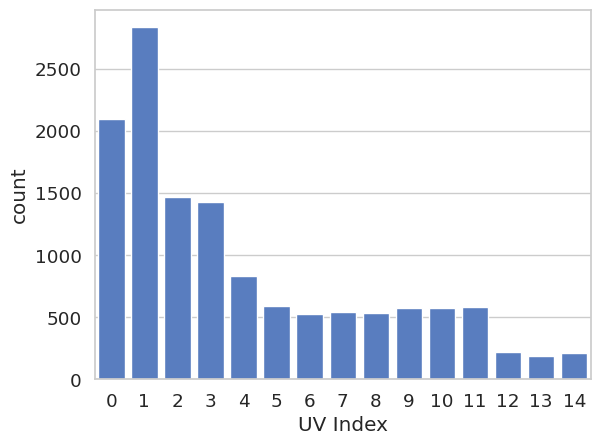

In [169]:
sns.countplot(x=df['UV Index'])

## `Season` Column

In [170]:
df['Season'].unique()

array(['Wentar', 'Spring', 'Winter', 'Summer', 'autum', 'Autumn',
       'It is so hot outside', 'It rains every day....', 'summer',
       'Wintar', 'sumer', 'I hate summer', 'Fall',
       'trees lose their leaves in this time', 'winter',
       'you can call it Autumn or Fall '], dtype=object)

In [171]:
df['Season'] = df['Season'].str.lower()

season_map = {
    'wentar': 'winter',
    'wintar': 'winter',

    'spring': 'spring',
    'it rains every day....': 'winter',

    'sumer': 'summer',
    'i hate summer': 'summer',
    'it is so hot outside': 'summer',

    'autumn': 'autumn',
    'autum': 'autumn',
    'fall': 'autumn',
    'trees lose their leaves in this time': 'autumn',
    'you can call it autumn or fall ': 'autumn',
}

df['Season'] = df['Season'].replace(season_map)


<Axes: ylabel='count'>

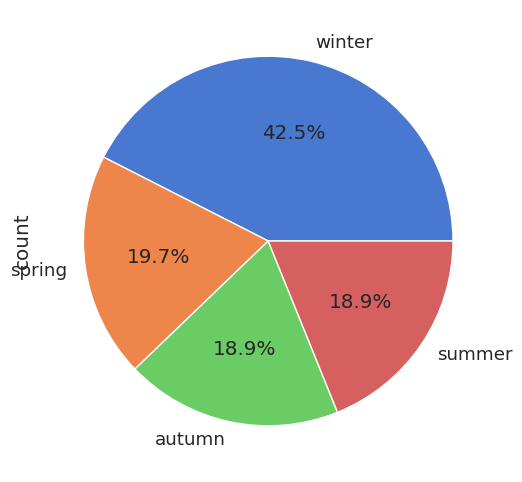

In [172]:
df['Season'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))


## `Visibility (km)` Column

In [173]:
df['Visibility (km)'].dtype

dtype('float64')

<Axes: xlabel='Visibility (km)', ylabel='Count'>

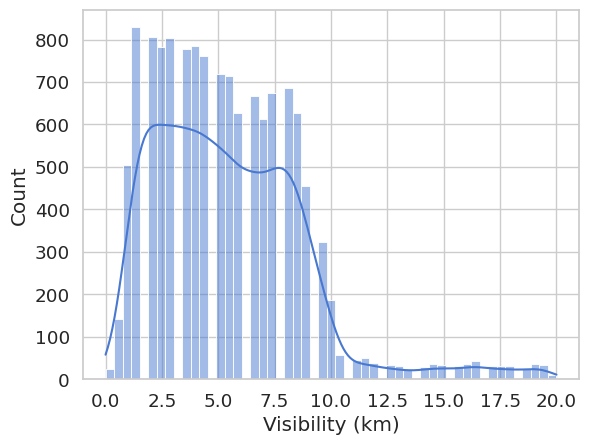

In [174]:
sns.histplot(df['Visibility (km)'], kde=True)

<Axes: ylabel='Visibility (km)'>

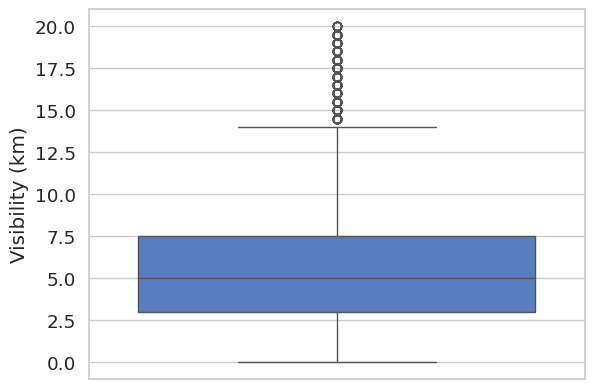

In [175]:
sns.boxplot(df['Visibility (km)'])

In [176]:
df = remove_outliers_iqr_to_nan(df, 'Visibility (km)')

In [177]:
df['Visibility (km)'].isna().sum()

np.int64(383)

## `Location` Cloumn

In [178]:
df['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

<Axes: ylabel='count'>

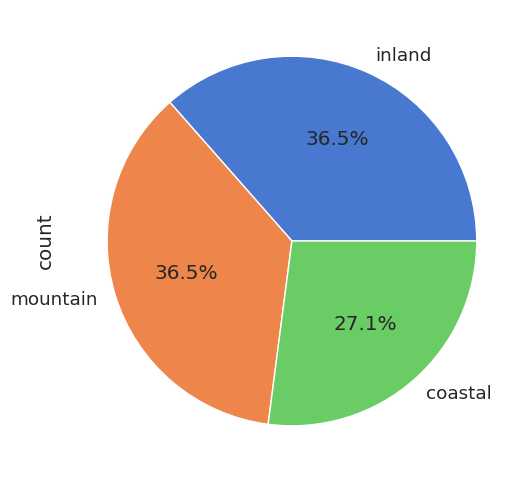

In [179]:
df['Location'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))

## `{Temperature},{Humdity}` Column

In [180]:
df['{Temperature},{Humdity}'].value_counts()

{Temperature},{Humdity}
{"Temperature": {"value": 30.0, "unit": "C"}, "Humidity": {"value": 61, "unit": "%"}}     16
{"Temperature": {"value": 22.0, "unit": "C"}, "Humidity": {"value": 72, "unit": "%"}}     16
{"Temperature": {"value": 32.0, "unit": "C"}, "Humidity": {"value": 63, "unit": "%"}}     15
{"Temperature": {"value": 30.0, "unit": "C"}, "Humidity": {"value": 71, "unit": "%"}}     15
{"Temperature": {"value": 15.0, "unit": "C"}, "Humidity": {"value": 76, "unit": "%"}}     15
                                                                                          ..
{"Temperature": {"value": -22.0, "unit": "C"}, "Humidity": {"value": 96, "unit": "%"}}     1
{"Temperature": {"value": -17.0, "unit": "C"}, "Humidity": {"value": 69, "unit": "%"}}     1
{"Temperature": {"value": -9.0, "unit": "C"}, "Humidity": {"value": 43, "unit": "%"}}      1
{"Temperature": {"value": 44.0, "unit": "C"}, "Humidity": {"value": 70, "unit": "%"}}      1
{"Temperature": {"value": 4.0, "unit": "C"}, "Humidity": {"value": 61, "unit": "%"}}       1
Name: count, Length: 4109, dtype: int64

In [181]:
Temp_Unit = df['{Temperature},{Humdity}'].apply(lambda x: json.loads(x)['Temperature']['unit'])
Humidity_Unit = df['{Temperature},{Humdity}'].apply(lambda x: json.loads(x)['Humidity']['unit'])

print("Temperature Units:", Temp_Unit.unique())
print("Humidity Units:", Humidity_Unit.unique())

Temperature Units: ['C']
Humidity Units: ['%']


In [182]:
df['{Temperature},{Humdity}'] = df['{Temperature},{Humdity}'].apply(json.loads)

df['Temperature (C)'] = df['{Temperature},{Humdity}'].apply(lambda x: x['Temperature']['value'])
df['Humidity (%)'] = df['{Temperature},{Humdity}'].apply(lambda x: x['Humidity']['value'])

In [183]:
print("Temperature (C) shape:", df['Temperature (C)'].shape)
print("Humidity (%) shape:", df['Humidity (%)'].shape)


Temperature (C) shape: (13200,)
Humidity (%) shape: (13200,)


In [184]:
df.drop(columns=['{Temperature},{Humdity}'], inplace=True)

### `Temperature (C)` Column

In [185]:
df['Temperature (C)'].isna().sum()

np.int64(0)

In [186]:
df['Temperature (C)'].dtype

dtype('float64')

<Axes: xlabel='Temperature (C)', ylabel='Count'>

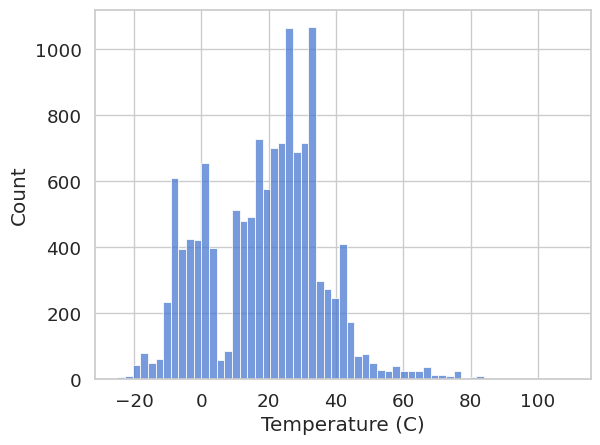

In [187]:
sns.histplot(df['Temperature (C)'])

### `Humidity (%)` Column

In [188]:
df['Humidity (%)'].isna().sum()

np.int64(0)

In [189]:
df['Humidity (%)'].dtype

dtype('int64')

In [190]:
df['Humidity (%)'].unique()

array([ 73,  96,  64,  83,  74,  55,  97,  85,  45,  43,  59,  87,  21,
        50,  27,  51,  46, 102,  67,  88,  36,  79,  72,  57,  61,  70,
        95,  69,  90, 105,  49,  37,  22,  54,  66,  25,  91,  98,  94,
        41,  84,  63,  75,  52,  89,  47,  81,  62,  31,  68,  35,  78,
        56,  93,  44,  38,  24,  82,  65,  80,  39,  48,  60,  29,  99,
        92,  76,  77,  86,  32,  58,  42,  30, 100,  33,  71, 107, 108,
        26, 106,  28, 109, 101,  34, 103,  40,  23, 104,  53,  20])

In [191]:
df.loc[(df['Humidity (%)'] < 0) | (df['Humidity (%)'] > 100), 'Humidity (%)'] = np.nan

In [192]:
df['Humidity (%)'].isna().sum()

np.int64(416)

<Axes: xlabel='Humidity (%)', ylabel='Count'>

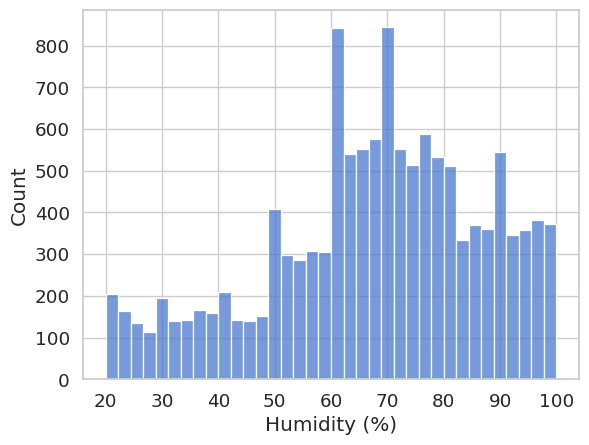

In [193]:
sns.histplot(df['Humidity (%)'])

## `Weather Type` Target Column

In [194]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

<Axes: ylabel='count'>

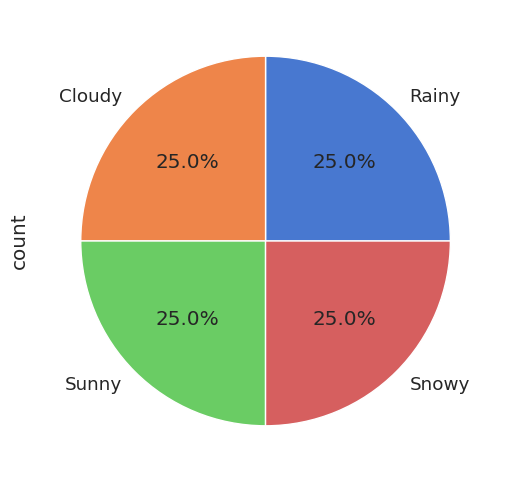

In [195]:
df['Weather Type'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6))


# EDA

In [196]:
df.describe(include='all').T


count unique       top  freq         mean        std  \
Wind Speed            12796.0    NaN       NaN   NaN     9.100031   5.552552   
Precipitation (%)     12808.0    NaN       NaN   NaN    52.072923  31.119669   
Cloud Cover             13200      4  overcast  6090          NaN        NaN   
Atmospheric Pressure  12273.0    NaN       NaN   NaN  1006.119219  13.066394   
UV Index              13200.0    NaN       NaN   NaN     4.005758     3.8566   
Season                  13200      4    winter  5610          NaN        NaN   
Visibility (km)       12817.0    NaN       NaN   NaN     5.117305   2.740377   
Location                13200      3    inland  4816          NaN        NaN   
Weather Type            13200      4     Rainy  3300          NaN        NaN   
Temperature (C)       13200.0    NaN       NaN   NaN    19.127576  17.386327   
Humidity (%)          12784.0    NaN       NaN   NaN    67.524406  19.396198   

                         min     25%      50%      75%      max  
Wind Speed               0.0     5.0      8.5     13.0     26.0  
Precipitation (%)        0.0    19.0     56.0     80.0    100.0  
Cloud Cover              NaN     NaN      NaN      NaN      NaN  
Atmospheric Pressure  962.72  995.66  1007.67  1016.25  1049.56  
UV Index                 0.0     1.0      3.0      7.0     14.0  
Season                   NaN     NaN      NaN      NaN      NaN  
Visibility (km)          0.0     3.0      5.0      7.5     14.0  
Location                 NaN     NaN      NaN      NaN      NaN  
Weather Type             NaN     NaN      NaN      NaN      NaN  
Temperature (C)        -25.0     4.0     21.0     31.0    109.0  
Humidity (%)            20.0    56.0     69.0     82.0    100.0

## Univariate Analysis

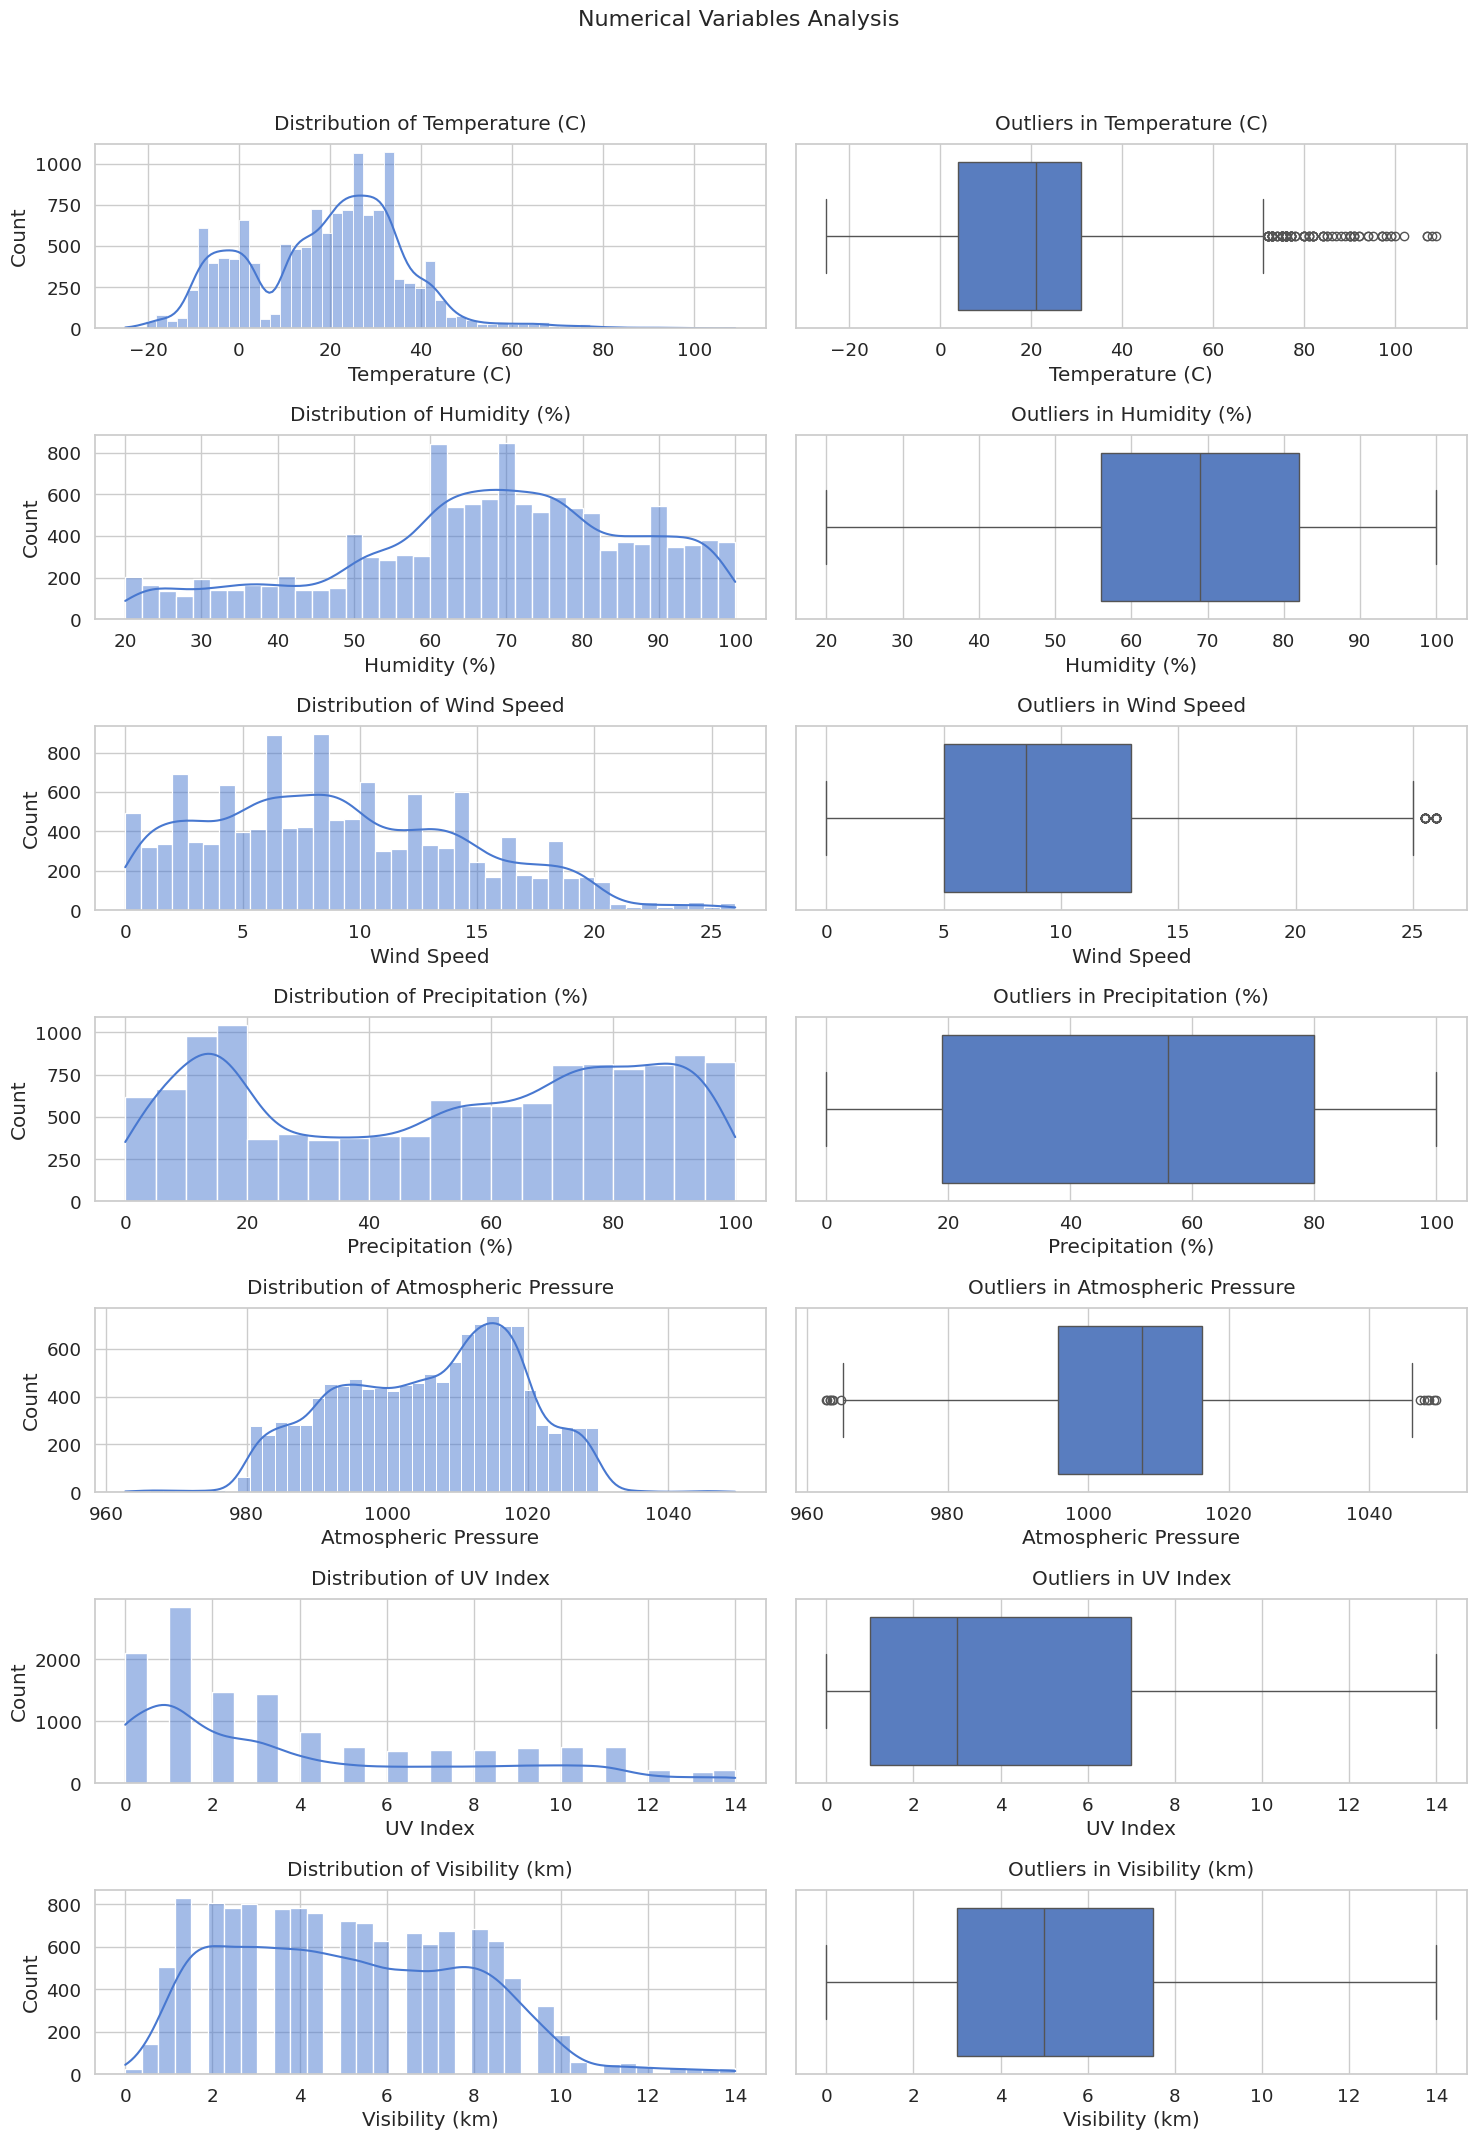

In [197]:
numeric_cols = ['Temperature (C)', 'Humidity (%)', 'Wind Speed', 'Precipitation (%)',
                'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Create a figure with histograms on left and boxplots on right
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2,
                         figsize=(15, 3*len(numeric_cols)))
fig.suptitle('Numerical Variables Analysis', y=1.02, fontsize=16)

for i, col in enumerate(numeric_cols):
    # Left column - Histograms
    sns.histplot(df[col], kde=True, ax=axes[i,0])
    axes[i,0].set_title(f'Distribution of {col}', pad=10)

    # Right column - Boxplots
    sns.boxplot(x=df[col], ax=axes[i,1])
    axes[i,1].set_title(f'Outliers in {col}', pad=10)

plt.tight_layout()
plt.show()

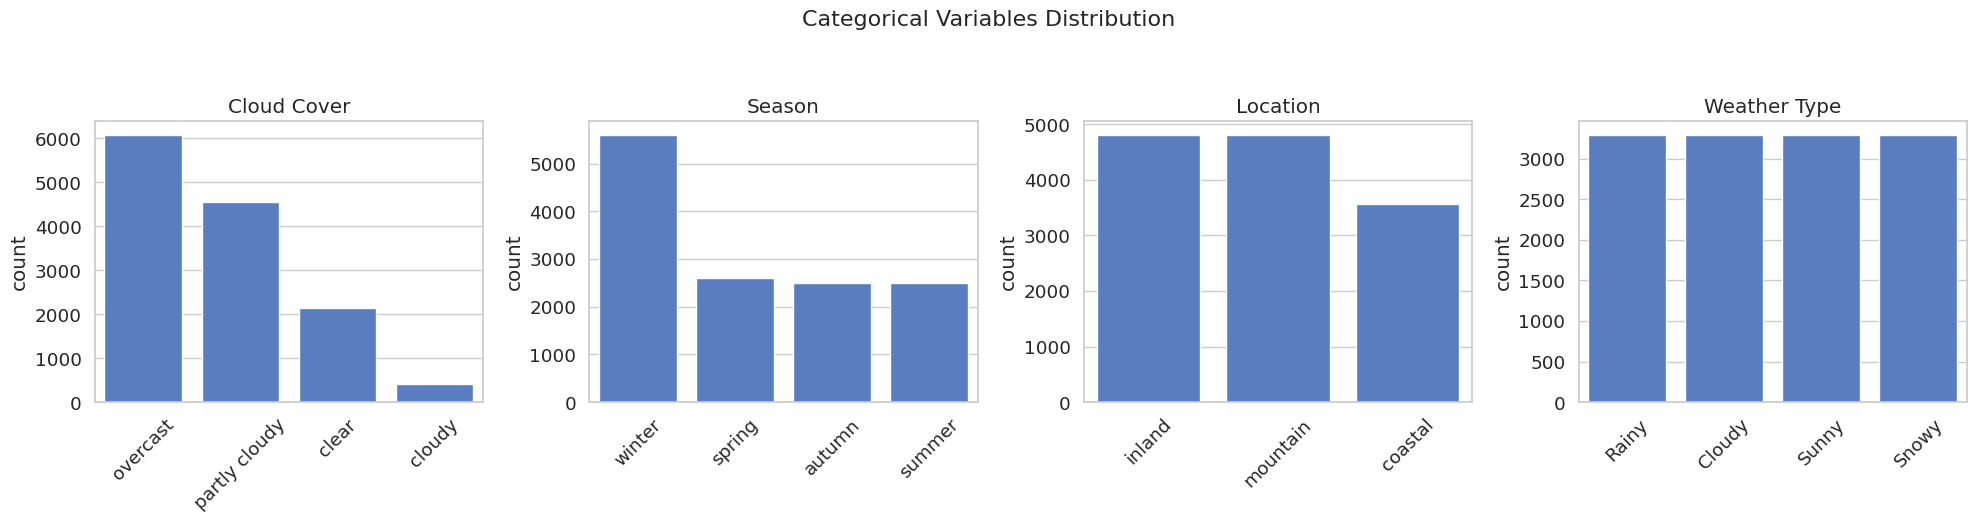

In [198]:
categorical_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']


fig, axes = plt.subplots(1, len(categorical_cols), figsize=(20, 5))
plt.suptitle('Categorical Variables Distribution', y=1.05, fontsize=16)

for ax, col in zip(axes, categorical_cols):
    sns.countplot(x=col, data=df, ax=ax, order=df[col].value_counts().index)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Bivariate Analysis



Numerical vs Target (Weather Type):


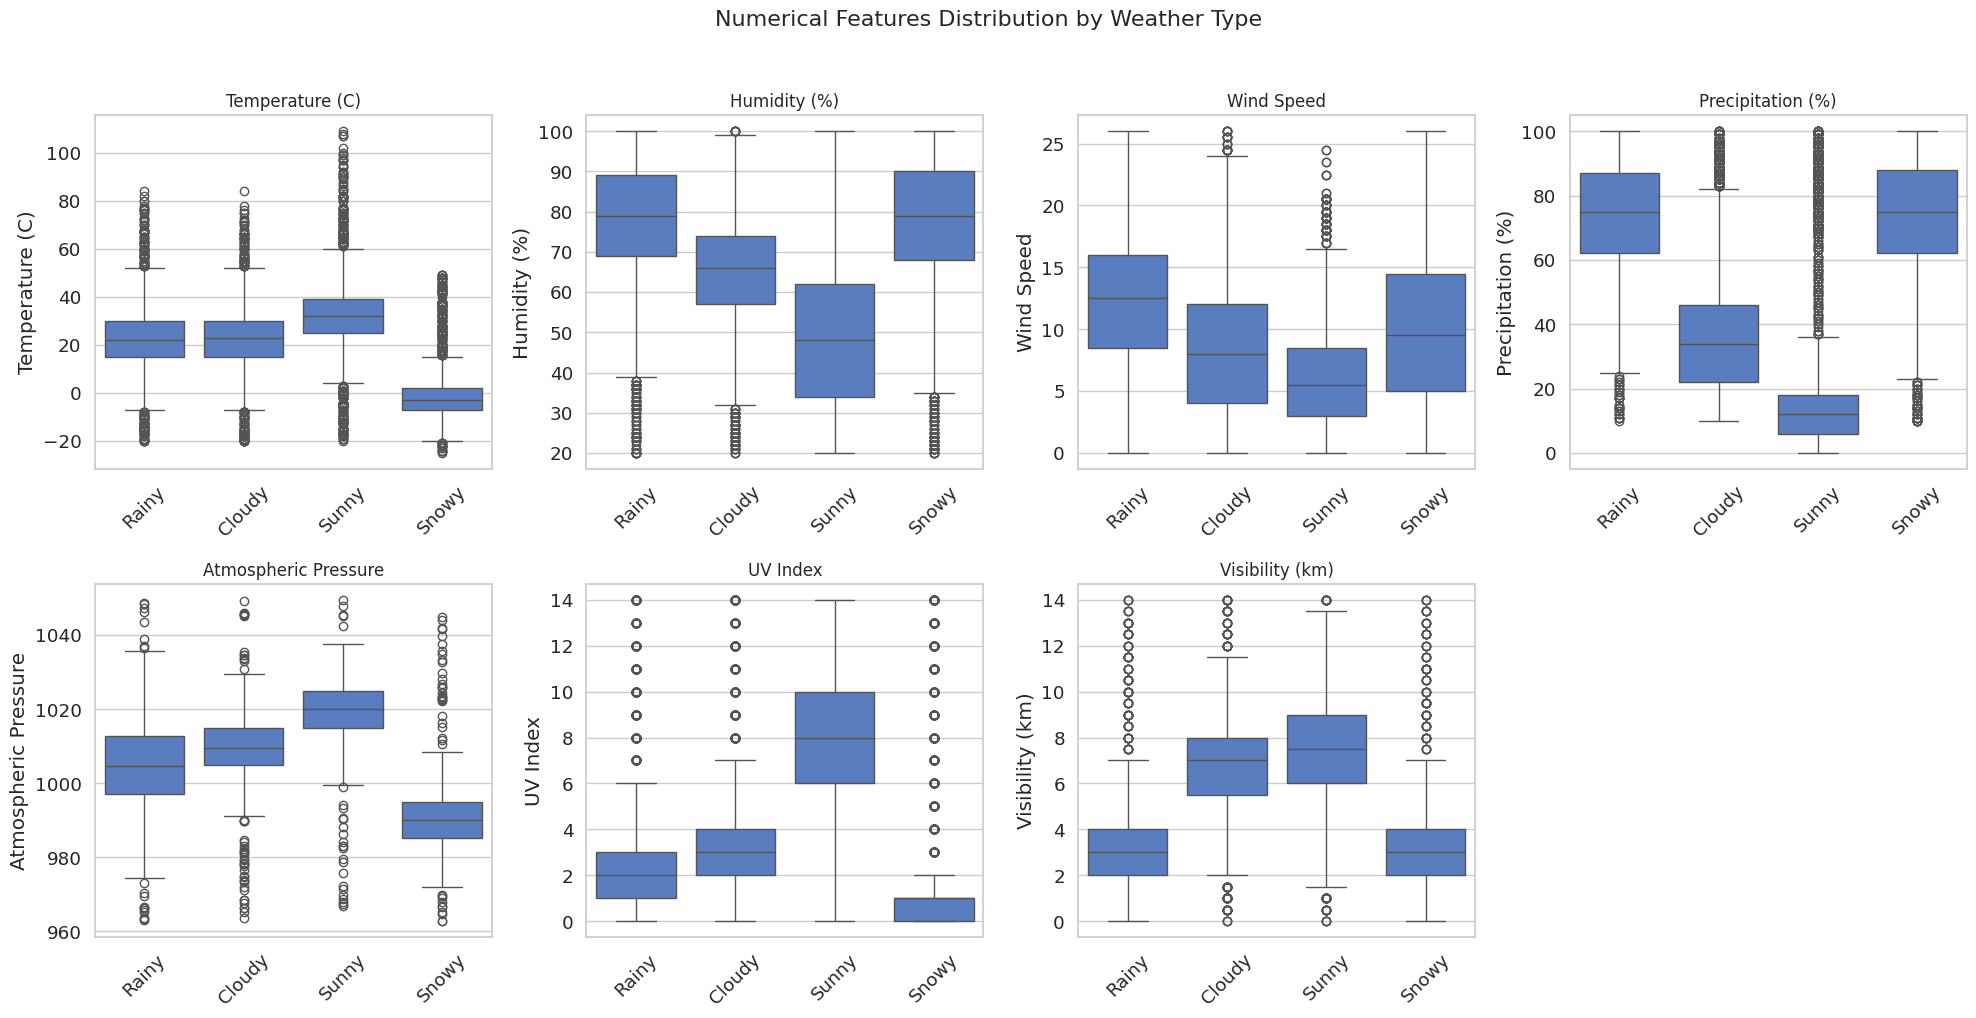

In [199]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, col in zip(axes[:len(numeric_cols)], numeric_cols):
    sns.boxplot(x='Weather Type', y=col, data=df, ax=ax)
    ax.set_title(col, fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')

# Hide unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.suptitle('Numerical Features Distribution by Weather Type', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Categorical vs Target:


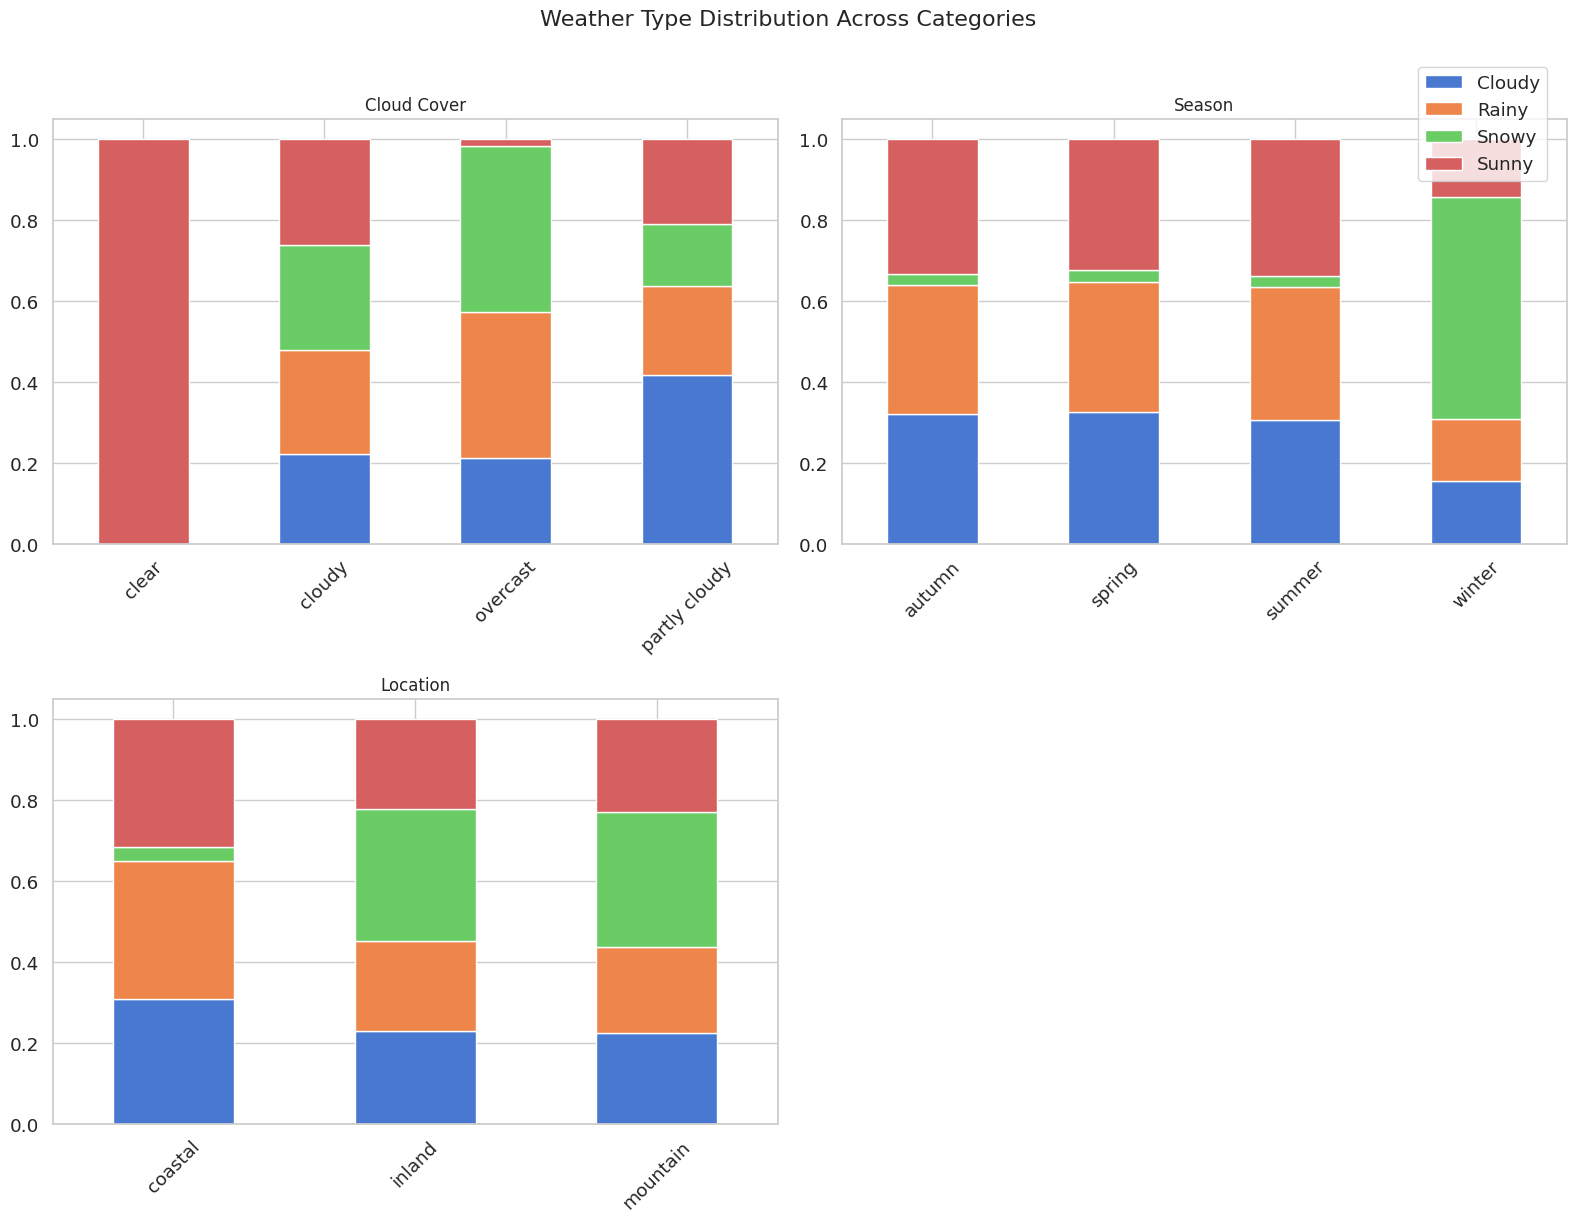

In [200]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten axes and remove the last one if we have odd number of plots
axes = axes.flatten()
for i in range(len(categorical_cols[:-1]), len(axes)):
    fig.delaxes(axes[i])  # This removes the empty subplot
axes = axes[:len(categorical_cols[:-1])]  # Keep only the ones we need

for ax, col in zip(axes, categorical_cols[:-1]):
    pd.crosstab(df[col], df['Weather Type'], normalize='index').plot(
        kind='bar',
        stacked=True,
        ax=ax,
        rot=45
    )
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')
    ax.legend().remove()  # Remove individual legends

# Add one shared legend
fig.legend(
    *axes[0].get_legend_handles_labels(),
    loc='upper right',
    bbox_to_anchor=(0.98, 0.98)
)

plt.suptitle('Weather Type Distribution Across Categories', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Multivariate Analysis

Correlation Analysis:


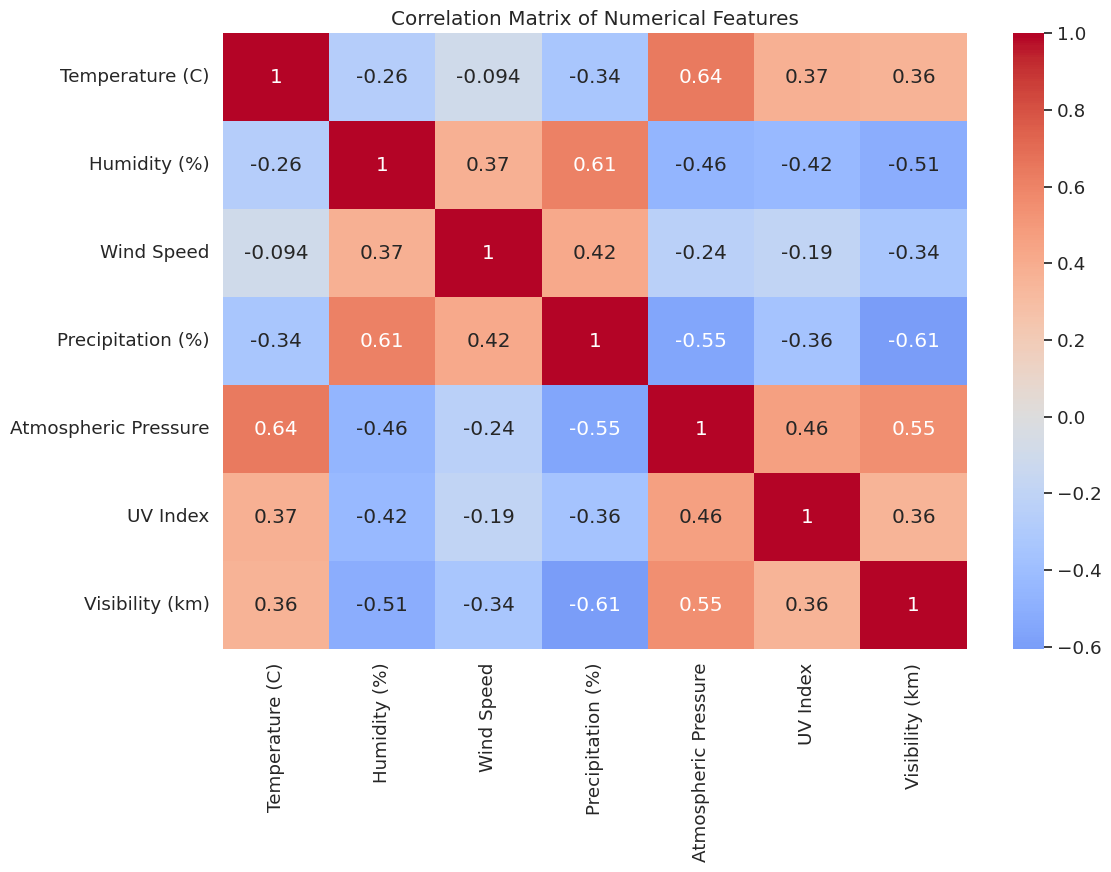

In [201]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Pair Plots:


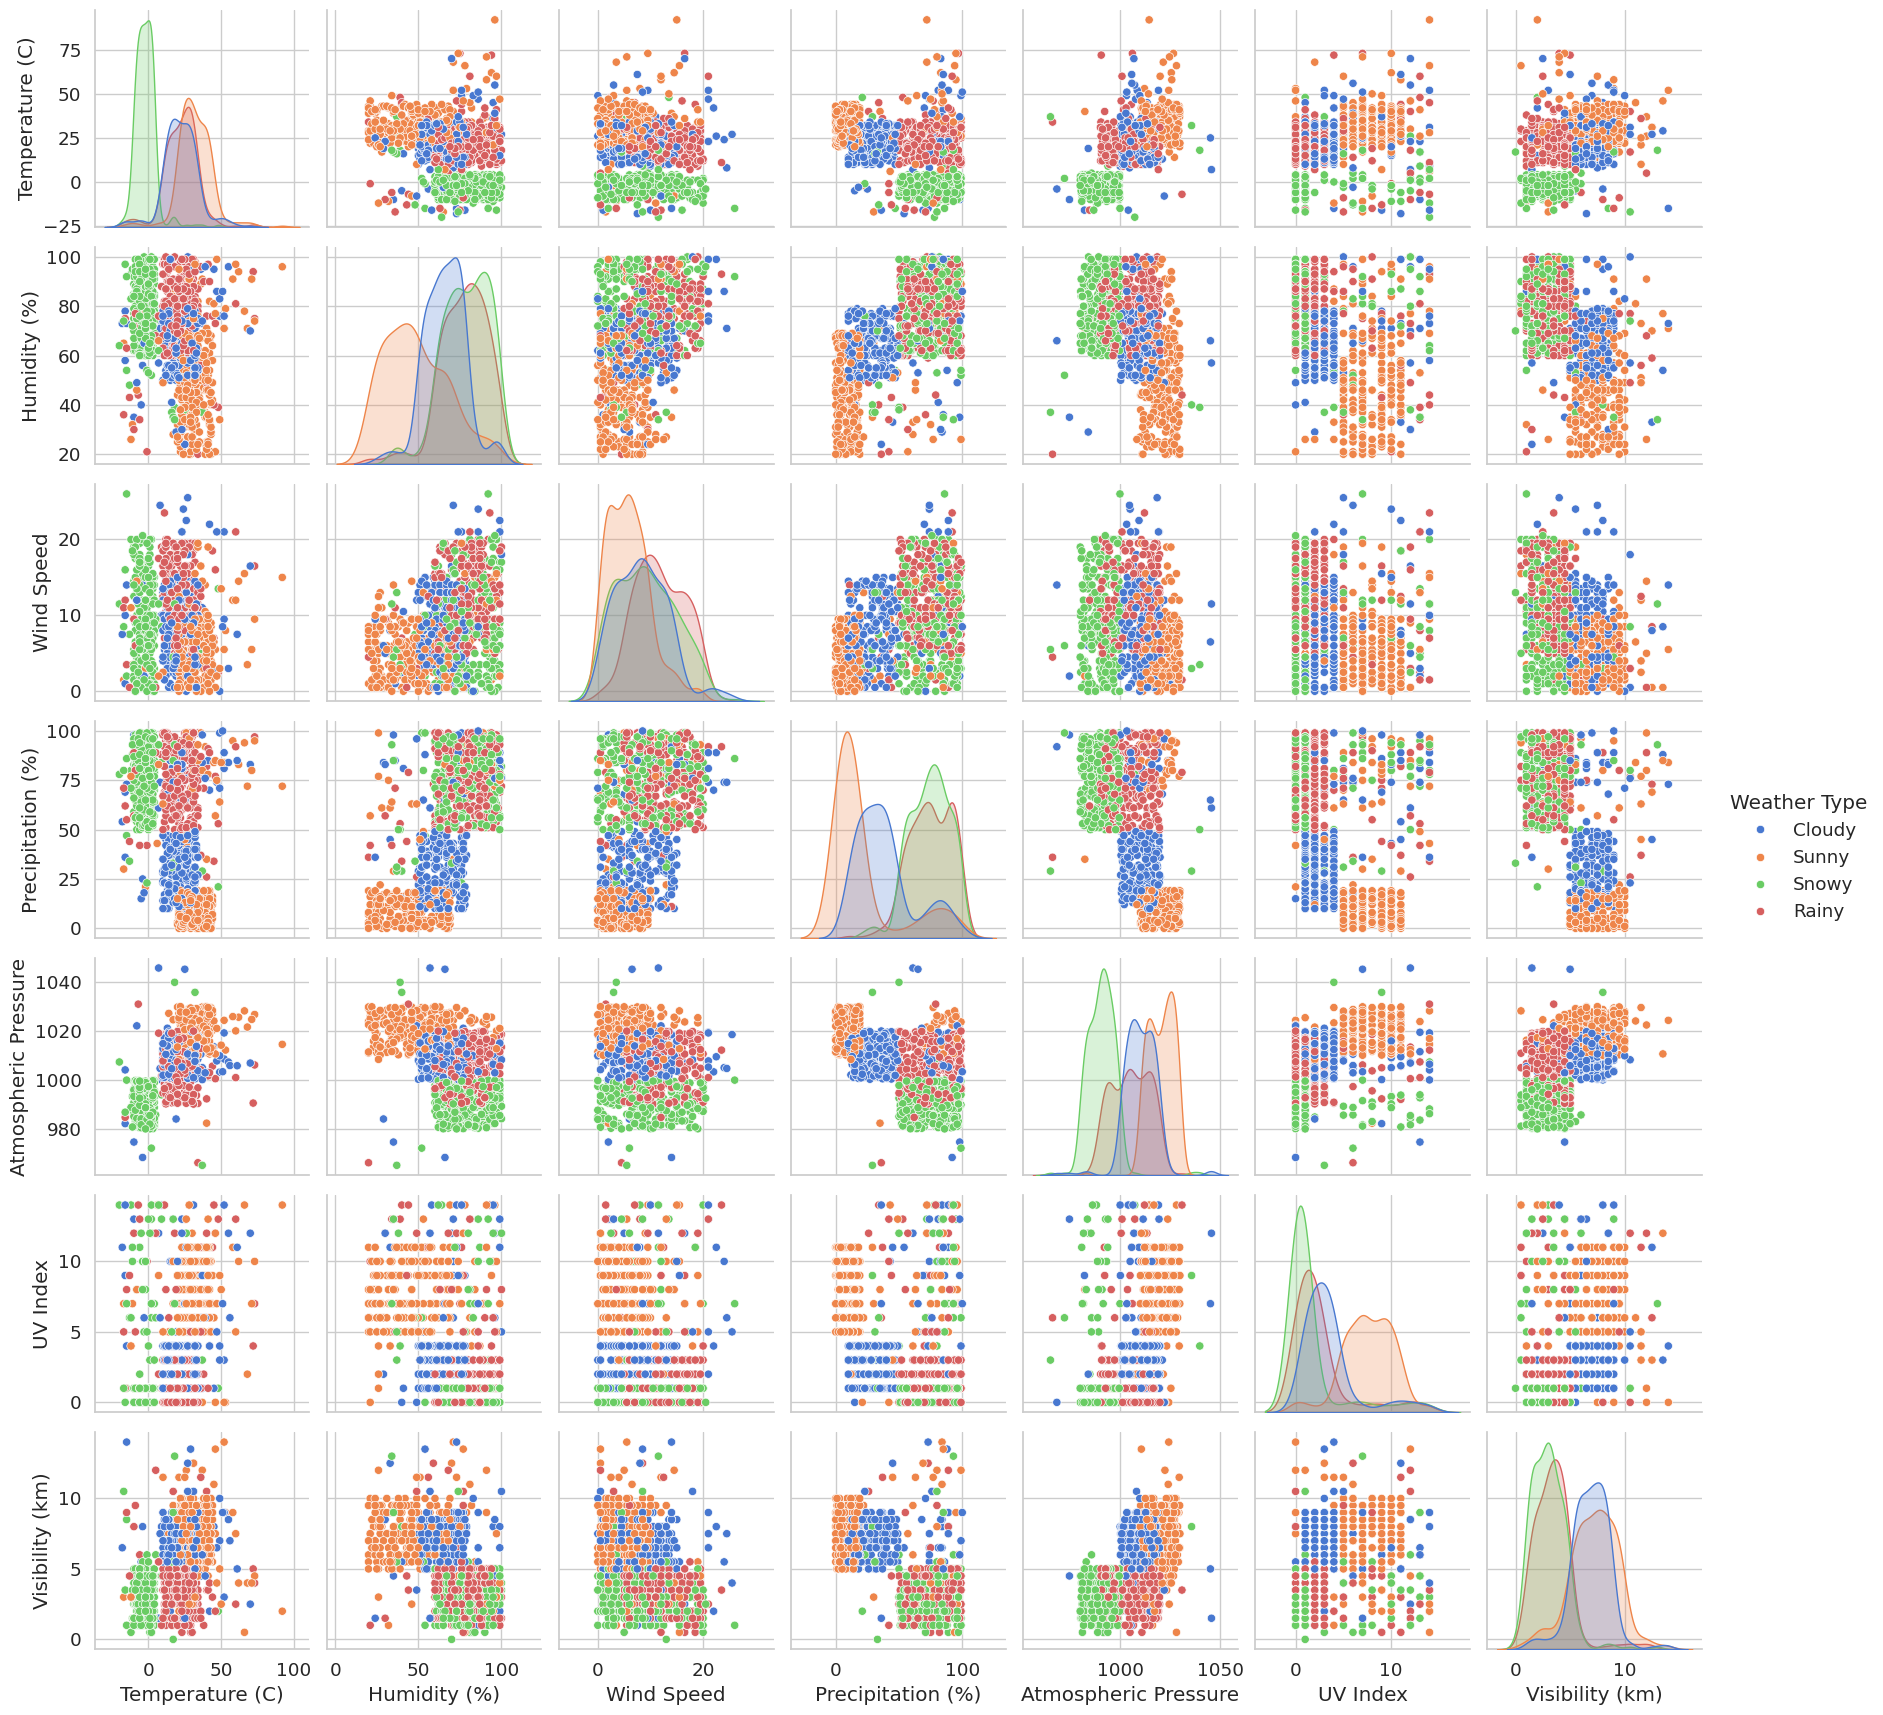

In [202]:
# Sample a subset
sample_df = df.sample(1000)

sns.pairplot(sample_df[numeric_cols + ['Weather Type']], hue='Weather Type')
plt.show()

## Time/Season Analysis

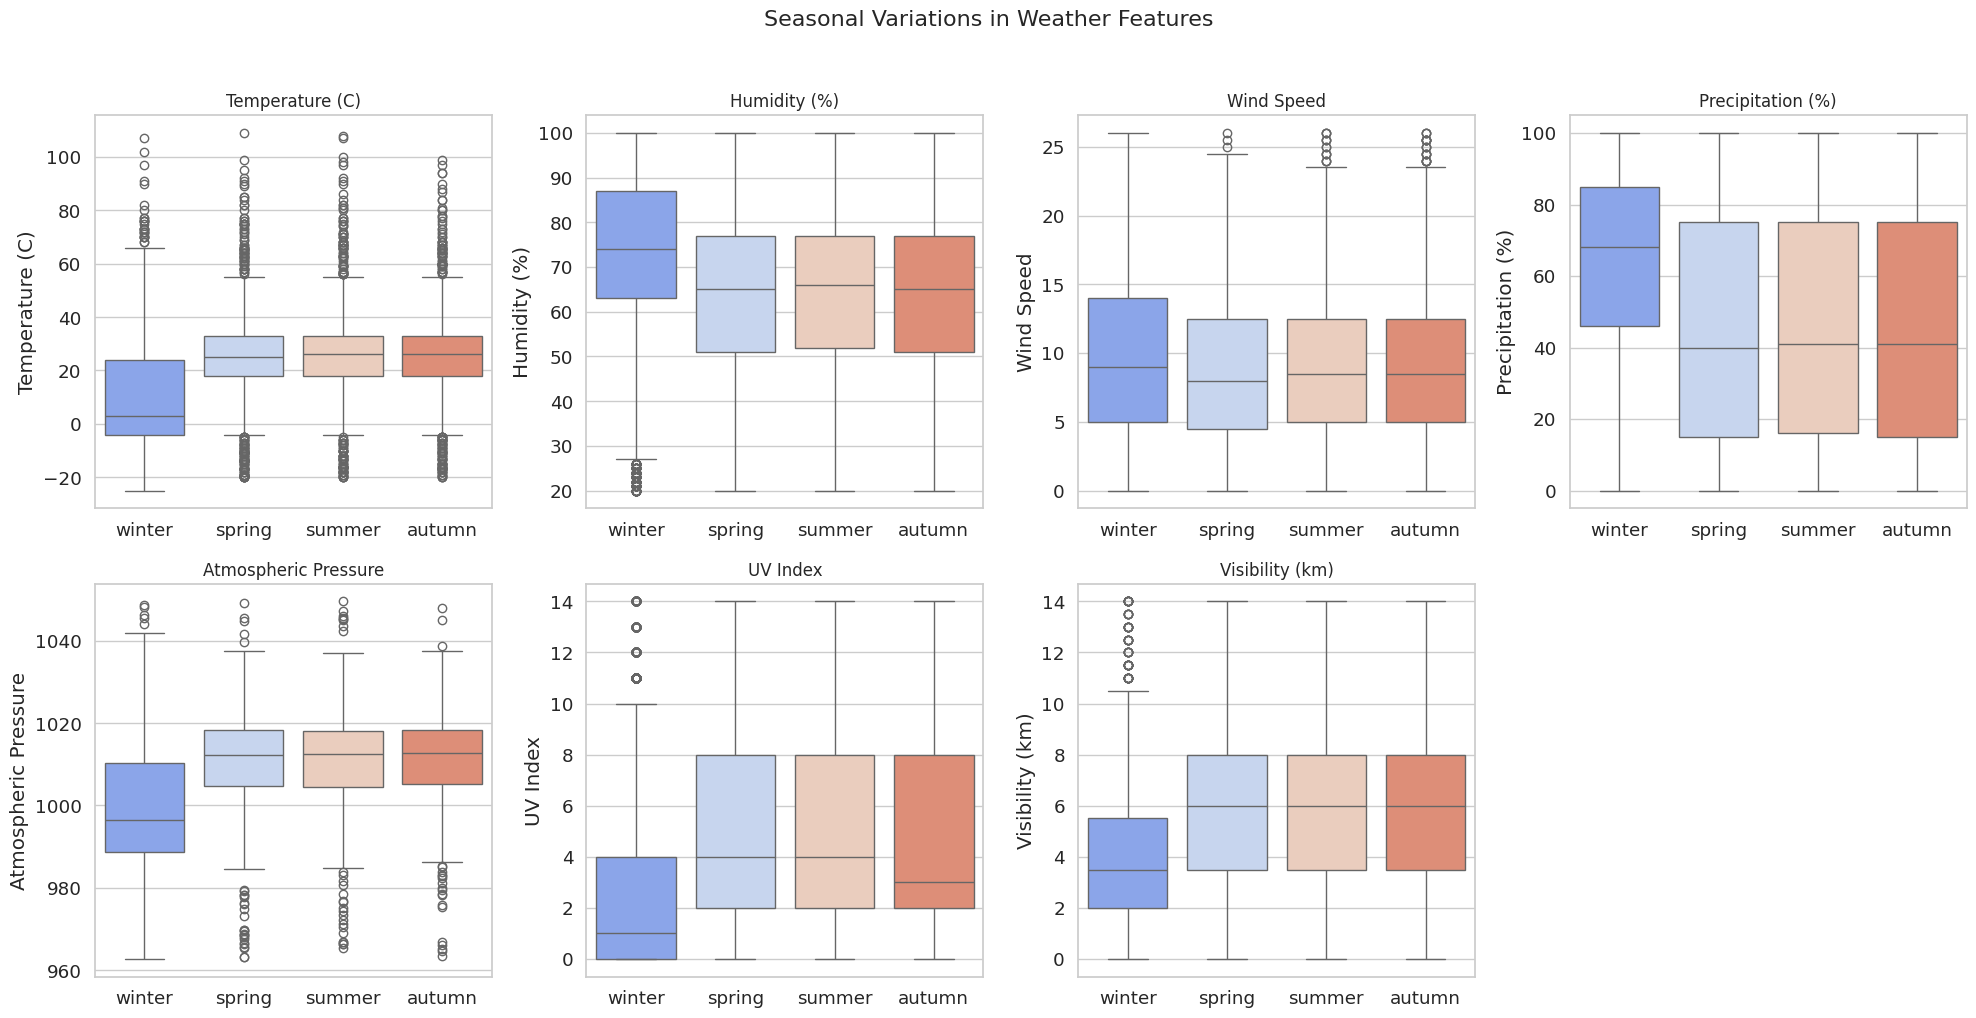

In [203]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, col in zip(axes[:len(numeric_cols)], numeric_cols):
    sns.boxplot(x='Season', y=col, data=df, ax=ax, palette='coolwarm')
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')

# Hide unused subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Seasonal Variations in Weather Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## Location Analysis

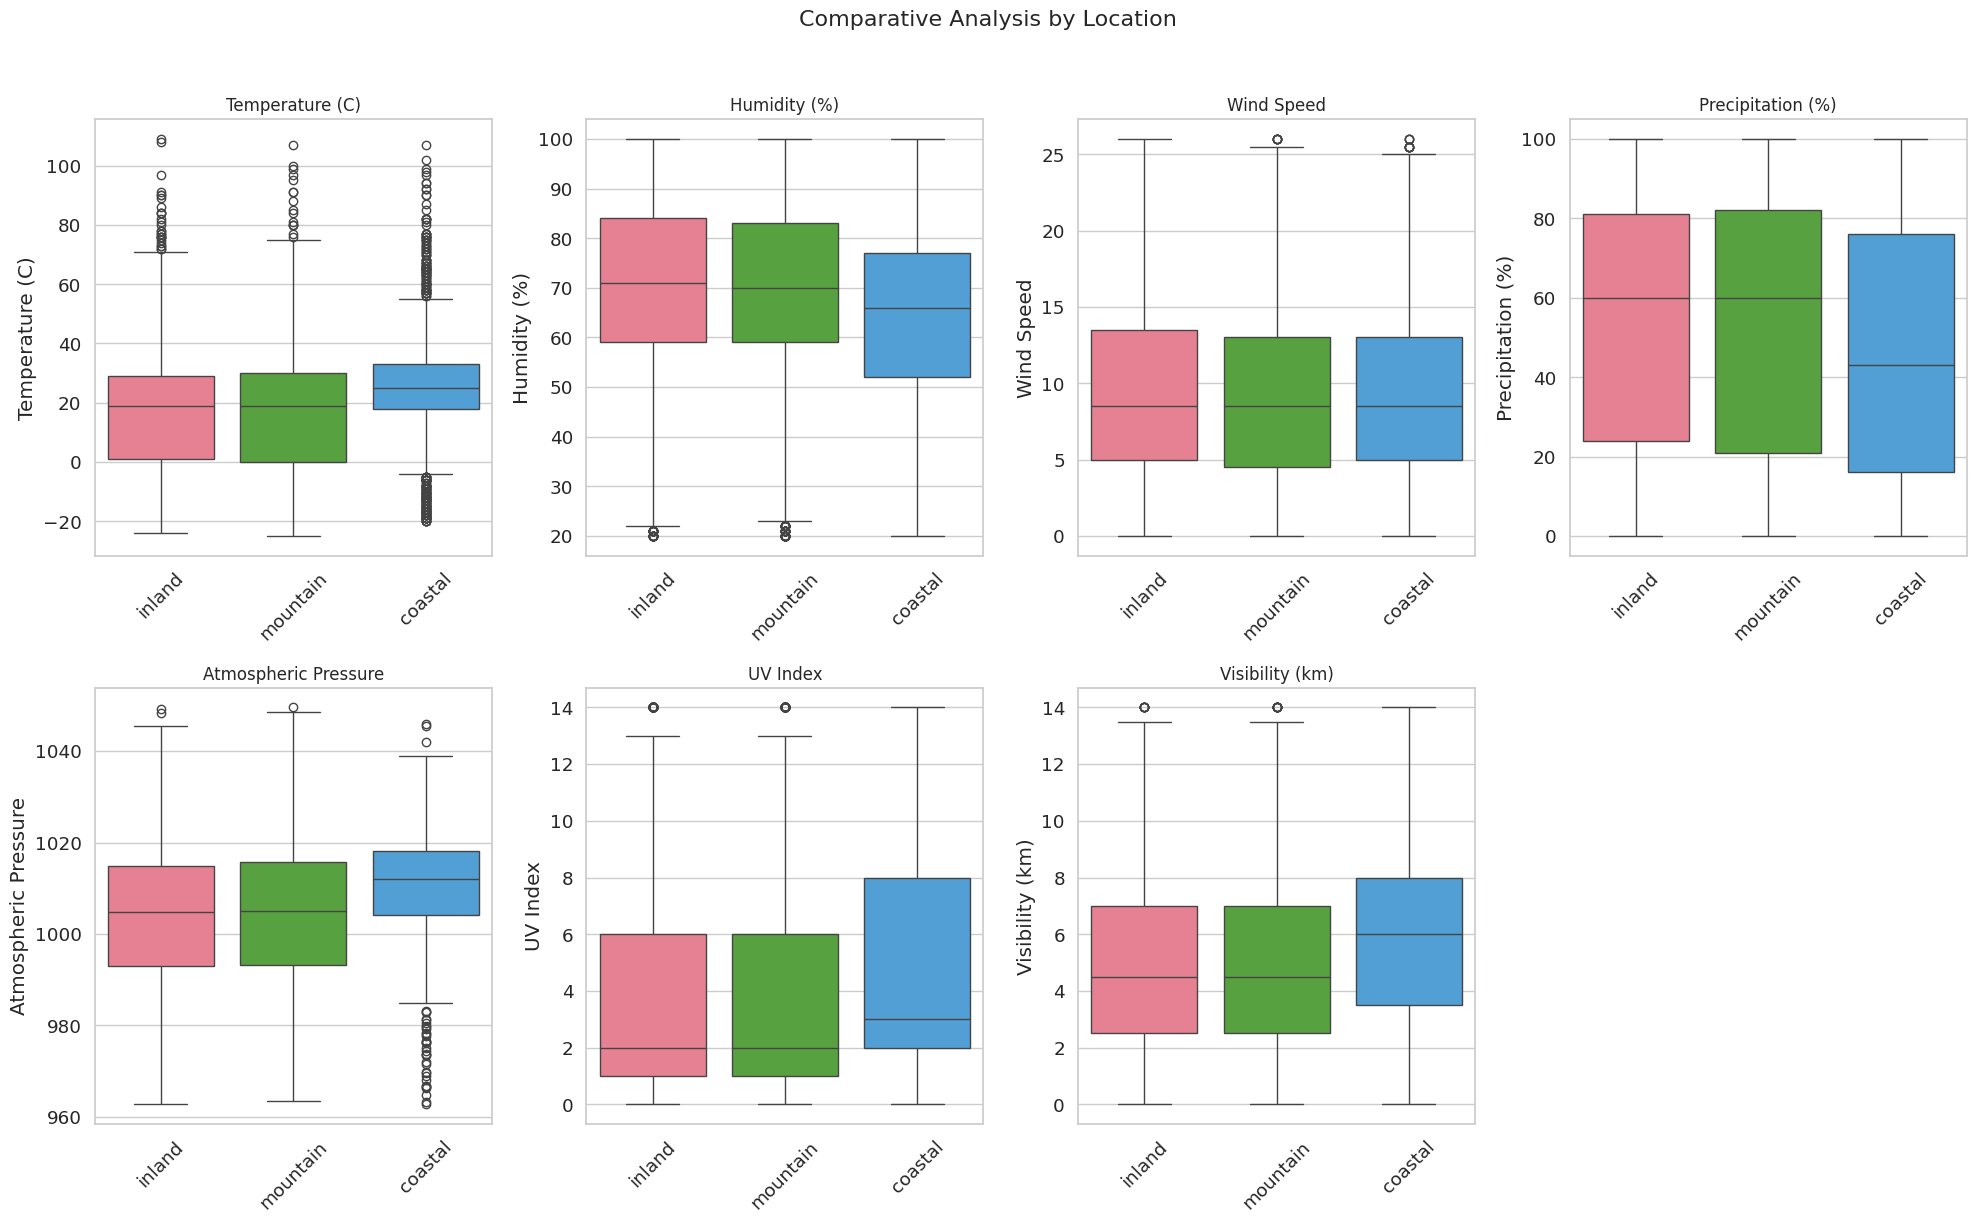

In [204]:
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()

for ax, col in zip(axes[:len(numeric_cols)], numeric_cols):
    sns.boxplot(x='Location', y=col, data=df, ax=ax, palette='husl')
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

# Remove empty subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Comparative Analysis by Location', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

## EDA Report



### 1. Dataset Overview
- The dataset contains **7 numerical** and **4 categorical** features (including the target variable **'Weather Type'**).
- Key measurements include: **temperature**, **humidity**, **wind speed**, **precipitation**, **pressure**, **UV index**, and **visibility**.
- Records span across different **seasons**, **locations** (urban, coastal, mountainous), and **cloud cover** conditions.

---

### 2. Numerical Features Analysis

#### 2.1 Distribution Analysis
- **Temperature (°C)**: Bimodal distribution with peaks at ~20°C and ~35°C. Outliers exist >80°C (likely anomalies).
- **Humidity (%)**: Uniformly spread with clustering between 60–80%.
- **Wind Speed (km/h)**: Right-skewed; most values <15 km/h, with outliers >25 km/h.
- **Precipitation (%)**: Bimodal; spikes at both low and high levels.
- **Pressure (hPa)**: Trimodal; suggests multiple weather regimes.
- **UV Index**: Right-skewed; mostly below 5, but outliers >11.
- **Visibility (km)**: Slight right skew; mostly 2–8 km, lowest in poor weather.

#### 2.2 Correlation Matrix Findings
**Strong Positive Correlations:**
- Temperature ↔ Pressure: **0.64**
- Pressure ↔ Visibility: **0.55**

**Strong Negative Correlations:**
- Precipitation ↔ Visibility: **-0.61**
- Humidity ↔ Visibility: **-0.51**
- Precipitation ↔ Pressure: **-0.55**

**Other Notables:**
- Temperature ↔ Humidity: **-0.26**
- Wind Speed ↔ Precipitation: **0.42**
- Temperature ↔ UV Index: **0.37**

---

### 3. Categorical Features Analysis

#### 3.1 Weather Type Distribution
- Weather types are **balanced**: Sunny, Cloudy, Rainy, and Snowy.
- **Overcast** cloud cover strongly correlates with **rainy** days.
- **Sunny** weather occurs predominantly under **clear** or **partly cloudy** skies.

#### 3.2 Season & Location Effects
**Seasonal Influence:**
- **Snowy** → Predominantly in **winter**
- **Sunny** → Peaks in **summer**
- **Rainy** → Common in **spring/autumn**

**Location Influence:**
- **Urban** areas → Higher temperatures (urban heat island effect)
- **Coastal** → Mild temperatures; more humidity
- **Mountainous** → Increased precipitation; lower visibility

---

### 4. Seasonal Patterns
- **Temperature**: Peaks in **summer**, lowest in **winter**.
- **Precipitation**: Most frequent in **spring** and **autumn**.
- **UV Index**: Highest in **summer**.
- **Humidity**: Relatively **stable** across seasons.
- **Visibility**: Best in **summer**; lowest in **snowy/rainy** days.

---

### 5. Weather Type vs Numerical Features
- **Sunny**: High temperature, high UV, low precipitation and humidity, excellent visibility.
- **Rainy**: High precipitation and humidity, low pressure and visibility.
- **Snowy**: Low temperature, high precipitation, low visibility.
- **Cloudy**: Mid-range conditions; acts as a transitional state.

---

### 6. Key Insights & Predictive Indicators

#### Strongest Drivers of Weather Type
- **Rainy**: Precipitation & humidity
- **Sunny**: Temperature & UV Index
- **Snowy**: Low temperature + high precipitation
- **Cloudy**: Moderate values across features

#### Feature Relationships
- **High pressure ↔ Sunny/clear conditions**
- **Low visibility ↔ Rain/Snow**
- **Precipitation ↔ Strongly predictive of non-sunny days**

#### Seasonal Insights
- **Summer**: High temp, UV index, low precipitation → mostly **sunny**
- **Winter**: Low temp, higher chance of **snow**
- **Spring/Autumn**: High precipitation → more **rainy/cloudy** days


# Preprocessing

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor



In [242]:
X = df.drop(columns=['Weather Type'], axis=1)
Y = df['Weather Type']

In [243]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [244]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [245]:
(x_train.isna().sum()/len(x_train)).sort_values(ascending=False)

Atmospheric Pressure    0.069886
Humidity (%)            0.030777
Wind Speed              0.030019
Precipitation (%)       0.029545
Visibility (km)         0.028693
Cloud Cover             0.000000
Season                  0.000000
UV Index                0.000000
Location                0.000000
Temperature (C)         0.000000
dtype: float64

In [246]:
num_cols = ['Temperature (C)', 'Humidity (%)', 'Wind Speed',
            'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
cat_cols = ['Cloud Cover', 'Season', 'Location']

In [247]:
num_pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer(estimator=BayesianRidge(), random_state=0)),
    ('scaler', StandardScaler())
])

In [248]:
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [249]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [250]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor)
])

In [251]:
X_train_prep_df = pd.DataFrame(
    pipeline.fit_transform(x_train),
    columns=pipeline.named_steps['preprocessing'].get_feature_names_out()
)

In [252]:
X_train_prep_df.isna().sum()

num__Temperature (C)              0
num__Humidity (%)                 0
num__Wind Speed                   0
num__Precipitation (%)            0
num__Atmospheric Pressure         0
num__UV Index                     0
num__Visibility (km)              0
cat__Cloud Cover_clear            0
cat__Cloud Cover_cloudy           0
cat__Cloud Cover_overcast         0
cat__Cloud Cover_partly cloudy    0
cat__Season_autumn                0
cat__Season_spring                0
cat__Season_summer                0
cat__Season_winter                0
cat__Location_coastal             0
cat__Location_inland              0
cat__Location_mountain            0
dtype: int64

In [253]:
X_train_prep = pipeline.fit_transform(x_train)


In [254]:
X_test_prep = pipeline.transform(x_test)

# Modeling

In [ ]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [309]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report


Evaluating: Logistic Regression
Cross-validation scores: [0.88352273 0.88778409 0.8844697  0.88683712 0.89630682]
Mean CV Accuracy: 0.8878
Std CV Accuracy: 0.0045

Evaluating: Ridge Classifier
Cross-validation scores: [0.81770833 0.82102273 0.81439394 0.82433712 0.82054924]
Mean CV Accuracy: 0.8196
Std CV Accuracy: 0.0033

Evaluating: Random Forest
Cross-validation scores: [0.91477273 0.91193182 0.91051136 0.92092803 0.921875  ]
Mean CV Accuracy: 0.9160
Std CV Accuracy: 0.0046

Evaluating: Decision Tree
Cross-validation scores: [0.90530303 0.90530303 0.89962121 0.90625    0.90814394]
Mean CV Accuracy: 0.9049
Std CV Accuracy: 0.0028

Evaluating: SVC
Cross-validation scores: [0.90340909 0.90246212 0.90625    0.92092803 0.9124053 ]
Mean CV Accuracy: 0.9091
Std CV Accuracy: 0.0069

Evaluating: XGBoost
Cross-validation scores: [0.91382576 0.90767045 0.90956439 0.91477273 0.92518939]
Mean CV Accuracy: 0.9142
Std CV Accuracy: 0.0061

Evaluating: Extra Trees
Cross-validation scores: [0.9038825

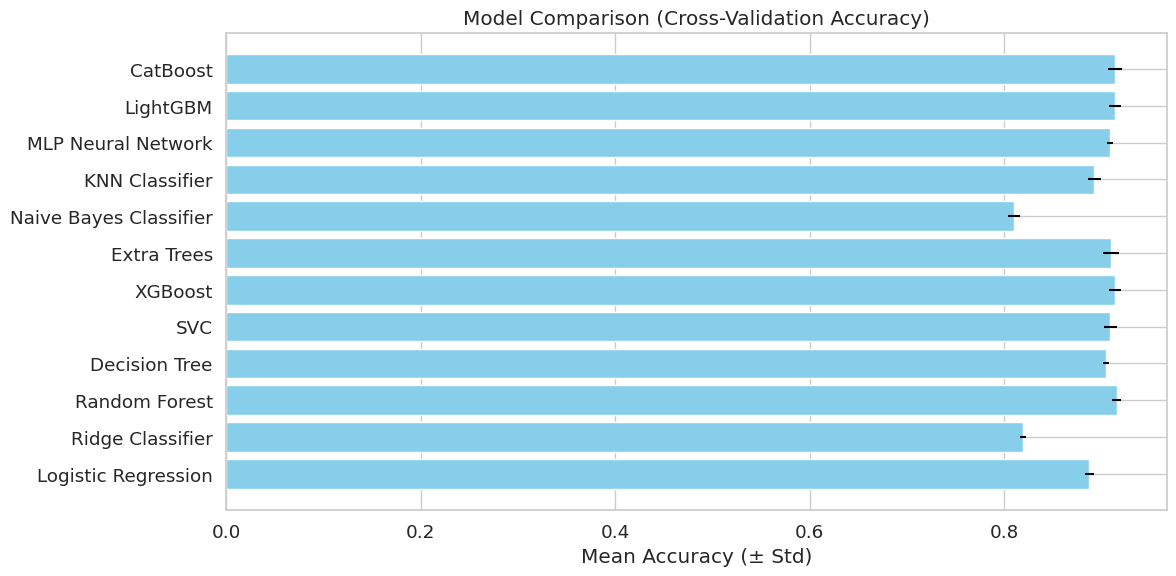

In [287]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Ridge Classifier': RidgeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42),
    'Decision Tree': DecisionTreeClassifier(criterion="entropy", random_state=42),
    'SVC': SVC(C=30, kernel="rbf"),
    'XGBoost': XGBClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Naive Bayes Classifier': GaussianNB(),
    'KNN Classifier': KNeighborsClassifier(n_neighbors=15, p=5, metric="minkowski"),
    'MLP Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42)
}

# --- Evaluate models ---
val_scores = {}

for name, model in models.items():
    print(f"Evaluating: {name}")
    scores = cross_val_score(model, X_train_prep, y_train, cv=5, scoring='accuracy')
    val_scores[name] = scores
    print(f"Cross-validation scores: {scores}")
    print(f"Mean CV Accuracy: {np.mean(scores):.4f}")
    print(f"Std CV Accuracy: {np.std(scores):.4f}\n")

means = [np.mean(v) for v in val_scores.values()]
stds = [np.std(v) for v in val_scores.values()]

plt.figure(figsize=(12, 6))
plt.barh(list(val_scores.keys()), means, xerr=stds, color='skyblue')
plt.xlabel("Mean Accuracy (± Std)")
plt.title("Model Comparison (Cross-Validation Accuracy)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [290]:
RF_pipeline = Pipeline([
    ('pipeline', pipeline),
    ('RF', RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)),
])

In [289]:
param_grid = {
    'RF__n_estimators': [50, 100, 150],
    'RF__max_depth': [None, 10, 20, 30],
    'RF__min_samples_split': [2, 5, 10],
    'RF__min_samples_leaf': [1, 2, 4]
}

In [294]:
grid_search = GridSearchCV(RF_pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('preprocessing',
                                                         ColumnTransformer(transformers=[('num',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           IterativeImputer(estimator=BayesianRidge(),
                                                                                                                            random_state=0)),
                                                                                                          ('scaler',
                                                                                                           StandardScaler())]),
                                                                                          ['Temperature '
                                                                                           '(C)',
                                                                                           'Humidity '
                                                                                           '(%)',
                                                                                           'Wind '
                                                                                           'Speed',
                                                                                           'Precipitation '
                                                                                           '(%)',
                                                                                           'Atmospheric '
                                                                                           'Pressure',
                                                                                           'UV '
                                                                                           'Index...
                                                                                           '(km)']),
                                                                                         ('cat',
                                                                                          Pipeline(steps=[('encoder',
                                                                                                           OneHotEncoder(handle_unknown='ignore'))]),
                                                                                          ['Cloud '
                                                                                           'Cover',
                                                                                           'Season',
                                                                                           'Location'])]))])),
                                       ('RF',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RF__max_depth': [None, 10, 20, 30],
                         'RF__min_samples_leaf': [1, 2, 4],
                         'RF__min_samples_split': [2, 5, 10],
                         'RF__n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [299]:
print("Best Grid Search Parameters:", grid_search.best_params_)
print("Best Grid Search Accuracy:", grid_search.best_score_)



Best Grid Search Parameters: {'RF__max_depth': 20, 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 10, 'RF__n_estimators': 50}
Best Grid Search Accuracy: 0.9167613636363636


In [296]:
param_dist = {
    'RF__n_estimators': np.arange(50, 201, 25),
    'RF__max_depth': [None] + list(np.arange(5, 31, 5)),
    'RF__min_samples_split': [2, 5, 10],
    'RF__min_samples_leaf': [1, 2, 4],
    'RF__max_features': ['sqrt', 'log2']
}

In [297]:
random_search = RandomizedSearchCV(RF_pipeline, param_distributions=param_dist,
                                   n_iter=30, cv=5, scoring='accuracy',
                                   n_jobs=-1, random_state=42, verbose=1)
random_search.fit(x_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('preprocessing',
                                                               ColumnTransformer(transformers=[('num',
                                                                                                Pipeline(steps=[('imputer',
                                                                                                                 IterativeImputer(estimator=BayesianRidge(),
                                                                                                                                  random_state=0)),
                                                                                                                ('scaler',
                                                                                                                 StandardScaler())]),
                                                                                                ['Temperature '
                                                                                                 '(C)',
                                                                                                 'Humidity '
                                                                                                 '(%)',
                                                                                                 'Wind '
                                                                                                 'Speed',
                                                                                                 'Precipitation '
                                                                                                 '(%)',
                                                                                                 'Atmospheric '
                                                                                                 'Pressure',
                                                                                                 'UV '...
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'RF__max_depth': [None, np.int64(5),
                                                          np.int64(10),
                                                          np.int64(15),
                                                          np.int64(20),
                                                          np.int64(25),
                                                          np.int64(30)],
                                        'RF__max_features': ['sqrt', 'log2'],
                                        'RF__min_samples_leaf': [1, 2, 4],
                                        'RF__min_samples_split': [2, 5, 10],
                                        'RF__n_estimators': array([ 50,  75, 100, 125, 150, 175, 200])},
                   random_state=42, scoring='accuracy', verbose=1)

In [298]:
print("Best Randomized Search Parameters:", random_search.best_params_)
print("Best Randomized Search Accuracy:", random_search.best_score_)

Best Randomized Search Parameters: {'RF__n_estimators': np.int64(125), 'RF__min_samples_split': 2, 'RF__min_samples_leaf': 1, 'RF__max_features': 'log2', 'RF__max_depth': None}
Best Randomized Search Accuracy: 0.9169507575757576


In [300]:
best_model_rf = random_search.best_estimator_

In [302]:
y_pred_rf = best_model_rf.predict(x_test)

In [303]:
accuracy_score(y_test, y_pred_rf)


0.9121212121212121

In [304]:
cm = confusion_matrix(y_test, y_pred_rf)


<Axes: >

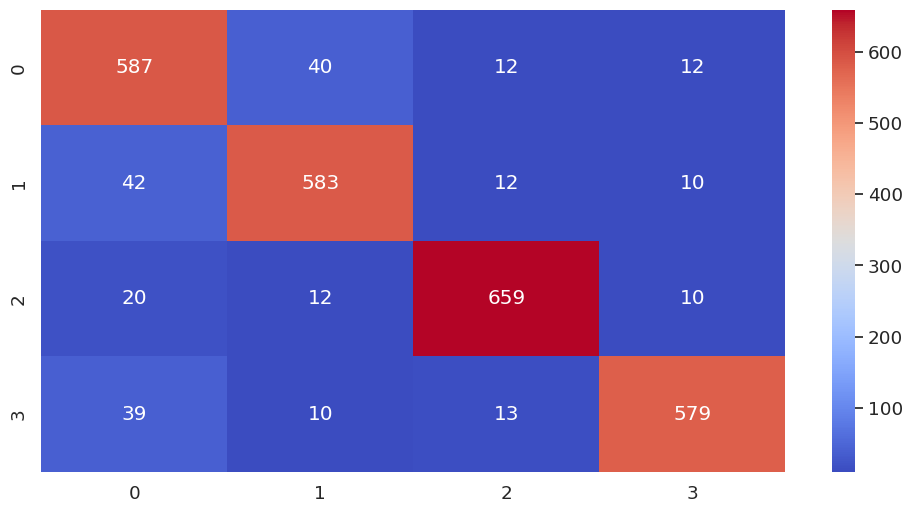

In [306]:
plt.figure(figsize=(12, 6))
sns.heatmap(cm, fmt = 'd' ,annot=True, cmap = 'coolwarm')


In [312]:
print(classification_report(y_test, y_pred_rf))



              precision    recall  f1-score   support

           0       0.85      0.90      0.88       651
           1       0.90      0.90      0.90       647
           2       0.95      0.94      0.94       701
           3       0.95      0.90      0.92       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



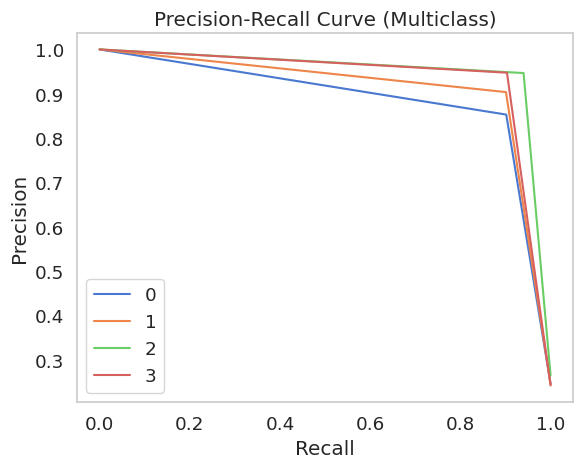

In [313]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Binarize labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_score_bin = label_binarize(y_pred_rf, classes=classes)

# Plot PR curve for each class
for i, class_label in enumerate(classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_bin[:, i])
    plt.plot(recall, precision, label=f"{class_label}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Multiclass)")
plt.legend()
plt.grid()
plt.show()


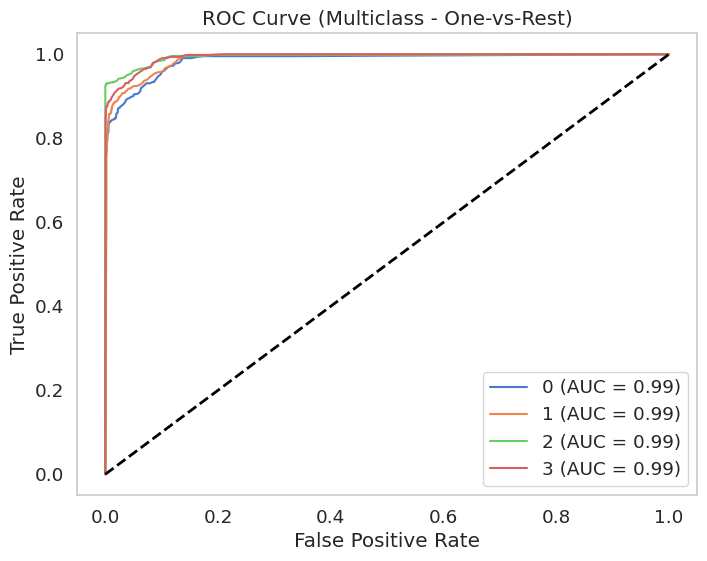

In [318]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get class labels
classes = np.unique(y_test)

# Binarize the output (one-vs-rest)
y_test_bin = label_binarize(y_test, classes=classes)
y_proba_bin = best_model_rf.predict_proba(x_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass - One-vs-Rest)')
plt.legend()
plt.grid()
plt.show()
